# Preprocessing

## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
# Membaca dataset dari file Excel
data_penelitian = pd.read_excel("Data_Penelitian.xlsx")
# Menyimpan DataFrame ke dalam file CSV
data_penelitian.to_csv("Data_Penelitian.csv", index=False)
# Membaca data terlebih dahulu
data_penelitian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           5103 non-null   object
 1   id_str               5103 non-null   int64 
 2   full_text            5102 non-null   object
 3   quote_count          5103 non-null   int64 
 4   reply_count          5103 non-null   int64 
 5   retweet_count        5103 non-null   int64 
 6   favorite_count       5103 non-null   int64 
 7   lang                 5103 non-null   object
 8   user_id_str          5103 non-null   int64 
 9   conversation_id_str  5103 non-null   int64 
 10  username             5103 non-null   object
 11  tweet_url            5103 non-null   object
dtypes: int64(7), object(5)
memory usage: 478.5+ KB


In [ ]:
# Melihat jumlah nilai yang hilang dalam setiap kolom
missing_values = data_penelitian.isnull().sum()
missing_values

created_at             0
id_str                 0
full_text              1
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64

In [ ]:
data_penelitian = data_penelitian.dropna()

In [ ]:
# Mengecek nilai unik dalam kolom 'lang'
unique_values = data_penelitian['lang'].value_counts().index

# Menampilkan nilai unik
print("Nilai unik dalam kolom 'lang':", unique_values)

# Mengecek apakah semua nilai dalam kolom 'lang' adalah 'in'
is_all_in = len(unique_values) == 1 and unique_values[0] == 'in'

# Menampilkan hasil
if is_all_in:
    print("Semua nilai dalam kolom 'lang' adalah 'in'.")
else:
    print("Ada nilai yang bukan 'in' dalam kolom 'lang'.")

Nilai unik dalam kolom 'lang': Index(['in'], dtype='object')
Semua nilai dalam kolom 'lang' adalah 'in'.


In [ ]:
# Memeriksa baris yang terduplikasi berdasarkan semua kolom
duplicate_rows = data_penelitian[data_penelitian.duplicated()]

# Menampilkan baris yang terduplikasi
print("Baris yang terduplikasi:")
print(duplicate_rows)

# Jumlah total baris yang terduplikasi
total_duplicates = len(duplicate_rows)
print(f"\nTotal baris yang terduplikasi: {total_duplicates}")

Baris yang terduplikasi:
Empty DataFrame
Columns: [created_at, id_str, full_text, quote_count, reply_count, retweet_count, favorite_count, lang, user_id_str, conversation_id_str, username, tweet_url]
Index: []

Total baris yang terduplikasi: 0


In [ ]:
data_penelitian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5102
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           5102 non-null   object
 1   id_str               5102 non-null   int64 
 2   full_text            5102 non-null   object
 3   quote_count          5102 non-null   int64 
 4   reply_count          5102 non-null   int64 
 5   retweet_count        5102 non-null   int64 
 6   favorite_count       5102 non-null   int64 
 7   lang                 5102 non-null   object
 8   user_id_str          5102 non-null   int64 
 9   conversation_id_str  5102 non-null   int64 
 10  username             5102 non-null   object
 11  tweet_url            5102 non-null   object
dtypes: int64(7), object(5)
memory usage: 518.2+ KB


In [ ]:
# Menentukan nama-nama kolom yang ingin dihapus
columns_to_drop = ['created_at', 'id_str', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'lang', 'user_id_str', 'conversation_id_str', 'username', 'tweet_url']

# Menghapus kolom-kolom yang ditentukan
data_penelitian = data_penelitian.drop(columns=columns_to_drop)

# Menampilkan dataframe setelah kolom-kolom dihapus
print(data_penelitian)

                                              full_text
0     @sumsanghpku @dreimora @tanyakanrl Kalau mau p...
1     @deaqct @zqhr Kenapa sih Lo nggak mikir kalo I...
2     Israel selama ini cuman nunggu serangan hamas ...
3     Cape banget ternyata masih ada yang mikir gini...
4     Hamas atau Fatah, Israel donÃ¢â‚¬â„¢t give a d...
...                                                 ...
5098  Sabar bgt si tinggal dithailand, ada konflik p...
5099  @Arya_Sena1973 Mereka sok tau banget tentang p...
5100  Konflik Hamas-Israel, AHY Dukung Pemerintah La...
5101  4 Alasan Irak Dapat Terserat dalam Konflik Ham...
5102  Pos Militer Israel Dibombardir, Konflik Israel...

[5102 rows x 1 columns]


In [ ]:
# save data yang telah dimodif
data_penelitian.to_csv('data_cleaning.csv', index=False)

## Case Folding, Filtering, Tokenizing, Stemming(sastrawi)

In [ ]:
data_cleaning = pd.read_csv('data_cleaning.csv')

In [ ]:
pip install Sastrawi

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True



*   case_folded_text: Ini adalah hasil dari proses case folding, di mana teks asli dikonversi menjadi huruf kecil semua.
*   cleaned_text: Ini adalah teks yang telah melalui proses filtering, di mana URL dan mention telah dihapus, dan hanya karakter alfabet yang dipertahankan.
*   tokens: Ini adalah hasil dari proses tokenizing, di mana teks telah dibagi menjadi token-token kata.
*   stemmed_tokens: Ini adalah hasil dari proses stemming, di mana setiap token kata telah di-stem menggunakan stemmer dari Sastrawi.

In [ ]:
# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat kamus singkatan
abbreviation_mapping = {
    'yg': 'yang',
    'dgn': 'dengan',
    # Tambahkan singkatan lainnya sesuai kebutuhan
}

# Menambahkan kata-kata penghubung ke dalam stop_words
stop_words = set(stopwords.words('indonesian'))
additional_stopwords = ["di", "dari", "yang", "dan", "dll"]
stop_words.update(additional_stopwords)

# Preprocessing Teks (Case Folding)
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)   # Filtering: Removing URLs
    text = re.sub('@[^\s]+', '', text)    # Filtering: Removing Mentions
    text = re.sub('[^a-zA-Z]', ' ', text) # Filtering: Keeping only alphabetic characters
    text = text.lower()                   # Case Folding: Converting text to lowercase
    return text

# Filtering
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_mentions(text):
    return re.sub('@[^\s]+', '', text)

def keep_alpha_chars(text):
    return re.sub('[^a-zA-Z]', ' ', text)

# Tokenizing
def tokenize_and_remove_stopwords(cleaned_text):
    # Mengganti singkatan dengan bentuk lengkap
    for abbreviation, full_form in abbreviation_mapping.items():
        cleaned_text = cleaned_text.replace(abbreviation, full_form)

    tokens = word_tokenize(cleaned_text)
    filtered_tokens = [word.lower() for word in tokens if
                       word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

# Memanggil fungsi-fungsi pra-pemrosesan teks ke dalam dataframe
data_cleaning['case_folded_text'] = data_cleaning['full_text'].apply(preprocess_text)
data_cleaning['cleaned_text'] = data_cleaning['full_text']
data_cleaning['cleaned_text'] = data_cleaning['cleaned_text'].apply(remove_urls)
data_cleaning['cleaned_text'] = data_cleaning['cleaned_text'].apply(remove_mentions)
data_cleaning['cleaned_text'] = data_cleaning['cleaned_text'].apply(keep_alpha_chars)
data_cleaning['tokens'] = data_cleaning['cleaned_text'].apply(tokenize_and_remove_stopwords)

In [ ]:
# Stemming
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Memanggil fungsi stemming ke dalam dataframe
data_cleaning['stemmed_tokens'] = data_cleaning['tokens'].apply(stem_tokens)

# Menampilkan hasil dalam bentuk tabel
print(data_cleaning.head(3))

                                           full_text  \
0  @sumsanghpku @dreimora @tanyakanrl Kalau mau p...   
1  @deaqct @zqhr Kenapa sih Lo nggak mikir kalo I...   
2  Israel selama ini cuman nunggu serangan hamas ...   

                                    case_folded_text  \
0     kalau mau pake logika ya lu bandingin aja s...   
1    kenapa sih lo nggak mikir kalo israel nggak ...   
2  israel selama ini cuman nunggu serangan hamas ...   

                                        cleaned_text  \
0     Kalau mau pake logika ya lu bandingin aja s...   
1    Kenapa sih Lo nggak mikir kalo Israel nggak ...   
2  Israel selama ini cuman nunggu serangan hamas ...   

                                              tokens  \
0  [pake, logika, ya, lu, bandingin, aja, ngereng...   
1  [sih, lo, nggak, mikir, kalo, israel, nggak, m...   
2  [israel, cuman, nunggu, serangan, hamas, biar,...   

                                      stemmed_tokens  
0  [pake, logika, ya, lu, bandingin, aja, nge

In [ ]:
# save data yang telah dimodif
data_cleaning.to_csv('preprocessing.csv', index=False)

# Labelling

In [ ]:
data = pd.read_csv('preprocessing.csv')

In [ ]:
!pip install transformers

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import pandas as pd
import numpy as np
import re

mengubah teks indonesia menjadi bahasa inggris

In [ ]:
data.head()

,full_text,case_folded_text,cleaned_text,tokens,stemmed_tokens
0,@sumsanghpku @dreimora @tanyakanrl Kalau mau p...,kalau mau pake logika ya lu bandingin aja s...,Kalau mau pake logika ya lu bandingin aja s...,"['pake', 'logika', 'ya', 'lu', 'bandingin', 'a...","['pake', 'logika', 'ya', 'lu', 'bandingin', 'a..."
1,@deaqct @zqhr Kenapa sih Lo nggak mikir kalo I...,kenapa sih lo nggak mikir kalo israel nggak ...,Kenapa sih Lo nggak mikir kalo Israel nggak ...,"['sih', 'lo', 'nggak', 'mikir', 'kalo', 'israe...","['sih', 'lo', 'nggak', 'mikir', 'kalo', 'israe..."
2,Israel selama ini cuman nunggu serangan hamas ...,israel selama ini cuman nunggu serangan hamas ...,Israel selama ini cuman nunggu serangan hamas ...,"['israel', 'cuman', 'nunggu', 'serangan', 'ham...","['israel', 'cuman', 'nunggu', 'serang', 'hamas..."
3,Cape banget ternyata masih ada yang mikir gini...,cape banget ternyata masih ada yang mikir gini...,Cape banget ternyata masih ada yang mikir gini...,"['cape', 'banget', 'mikir', 'gini', 'israel', ...","['cape', 'banget', 'mikir', 'gin', 'israel', '..."
4,"Hamas atau Fatah, Israel donÃ¢â‚¬â„¢t give a d...",hamas atau fatah israel don t give a d...,Hamas atau Fatah Israel don t give a d...,"['hamas', 'fatah', 'israel', 'don', 't', 'give...","['hamas', 'fatah', 'israel', 'don', 't', 'give..."


In [ ]:
data['kalimat'] = data['stemmed_tokens'].apply(lambda tokens: ''.join(tokens))
data['kalimat'] = data['kalimat'].str.replace(r"[^a-zA-Z0-9 ]", "")
print(data['kalimat'])

0       pake logika ya lu bandingin aja ngerenggut nya...
1       sih lo nggak mikir kalo israel nggak jajah ga ...
2       israel cuman nunggu serang hamas biar alas jal...
3       cape banget mikir gin israel bilang bela negar...
4       hamas fatah israel don t give a damn hamas tu ...
                              ...                        
5097    sabar bgt si tinggal dithailand konflik palest...
5098    sok tau banget politik timur katak tempurung i...
5099    konflik hamas israel ahy dukung perintah laku ...
5100                 alas irak serat konflik hamas israel
5101    pos militer israel bombardir konflik israel ha...
Name: kalimat, Length: 5102, dtype: object


<ipython-input-67-2631fbc2361c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['kalimat'] = data['kalimat'].str.replace(r"[^a-zA-Z0-9 ]", "")


In [ ]:
from googletrans.client import Translator
translator = Translator()

from transformers import pipeline
sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# Pastikan kolom 'kalimat' dalam DataFrame memiliki tipe data string
data['kalimat'] = data['kalimat'].astype(str)

In [ ]:
# Menerjemahkan teks dari bahasa Indonesia ke bahasa Inggris
data['label'] = data['kalimat'].apply(lambda s: translator.translate(s, src='id', dest='en').text)
data['label']

0       Use logic, you just compare it, it takes human...
1       You don't think that if Israel wasn't colonize...
2       Israel is just waiting to attack Hamas so that...
3       I'm really tired of thinking about it, Israel ...
4       Hamas Fatah Israel don't give a damn Hamas tha...
                              ...                        
5097    Very patient, living in Thailand, Palestinian ...
5098    Pretend to really know about eastern politics ...
5099    Israel's Hamas conflict Ahy supports the order...
5100    Iraq's base is the fiber of Israel's Hamas con...
5101    Israeli military post bombardment of widesprea...
Name: label, Length: 5102, dtype: object

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
data.to_csv('inggris.csv', index=False)

In [ ]:
# Menentukan sentimen dari teks yang telah diterjemahkan
data = (
    data
    .assign(sentiment=lambda x: x['label'].apply(lambda s: sentiment_classifier(s)))
    .assign(
        label=lambda x: x['sentiment'].apply(lambda s: s[0]['label']),
        score=lambda x: x['sentiment'].apply(lambda s: s[0]['score'])
    )
)

In [ ]:
# save data yang telah dimodif
data.to_csv('labelling.csv', index=False)

# Transformation

In [ ]:
data = pd.read_csv('labelling.csv')

In [ ]:
label_counts = data['label'].value_counts()
print(label_counts)

NEGATIVE    3593
POSITIVE    1509
Name: label, dtype: int64


In [ ]:
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Bagi data menjadi 60% untuk pelatihan dan 40% untuk pengujian
x_train, x_test, y_train, y_test = train_test_split(
    data['kalimat'].values,
    data['label'].values,
    test_size=0.4,
    random_state=42
)

print(f"Jumlah x train adalah {len(x_train)}")
print(f"Jumlah y train adalah {len(y_train)}")
print(f"Jumlah x test adalah {len(x_test)}")
print(f"Jumlah y test adalah {len(y_test)}")

# Bagi data menjadi 70% untuk pelatihan dan 30% untuk pengujian
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(
    data['kalimat'].values,
    data['label'].values,
    test_size=0.3,
    random_state=42
)

print(f"Jumlah x train (70%) adalah {len(x_train_70)}")
print(f"Jumlah y train (70%) adalah {len(y_train_70)}")
print(f"Jumlah x test (70%) adalah {len(x_test_70)}")
print(f"Jumlah y test (70%) adalah {len(y_test_70)}")

# Bagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(
    data['kalimat'].values,
    data['label'].values,
    test_size=0.2,
    random_state=42
)

print(f"Jumlah x train (80%) adalah {len(x_train_80)}")
print(f"Jumlah y train (80%) adalah {len(y_train_80)}")
print(f"Jumlah x test (80%) adalah {len(x_test_80)}")
print(f"Jumlah y test (80%) adalah {len(y_test_80)}")

# Bagi data menjadi 90% untuk pelatihan dan 10% untuk pengujian
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(
    data['kalimat'].values,
    data['label'].values,
    test_size=0.1,
    random_state=42
)

print(f"Jumlah x train (90%) adalah {len(x_train_90)}")
print(f"Jumlah y train (90%) adalah {len(y_train_90)}")
print(f"Jumlah x test (90%) adalah {len(x_test_90)}")
print(f"Jumlah y test (90%) adalah {len(y_test_90)}")

Jumlah x train adalah 3061
Jumlah y train adalah 3061
Jumlah x test adalah 2041
Jumlah y test adalah 2041
Jumlah x train (70%) adalah 3571
Jumlah y train (70%) adalah 3571
Jumlah x test (70%) adalah 1531
Jumlah y test (70%) adalah 1531
Jumlah x train (80%) adalah 4081
Jumlah y train (80%) adalah 4081
Jumlah x test (80%) adalah 1021
Jumlah y test (80%) adalah 1021
Jumlah x train (90%) adalah 4591
Jumlah y train (90%) adalah 4591
Jumlah x test (90%) adalah 511
Jumlah y test (90%) adalah 511


In [ ]:
# Inisialisasi vektorisasi
vect = CountVectorizer()

# Transformasi vektorisasi pada data train dan test 60:40
data_train = vect.fit_transform(x_train)
data_test = vect.transform(x_test)

# Transformasi vektorisasi pada data train dan test 70:30
data_train_70 = vect.fit_transform(x_train_70)
data_test_70 = vect.transform(x_test_70)

# Transformasi vektorisasi pada data train dan test 80:20
data_train_80 = vect.fit_transform(x_train_80)
data_test_80 = vect.transform(x_test_80)

# Transformasi vektorisasi pada data train dan test 90:10
data_train_90 = vect.fit_transform(x_train_90)
data_test_90 = vect.transform(x_test_90)

# Konversi matriks TF-IDF untuk data train ke dalam DataFrame
df_train_90 = pd.DataFrame(data_train_90.toarray(), columns=vect.get_feature_names_out())

# Cetak 5 baris teratas dari DataFrame
print("5 baris teratas dari matriks TF-IDF untuk data train dengan rasio 90:10:")
print(df_train_90.head())

# Cetak fitur atau kata-kata yang diubah menjadi fitur vektor
print("\nFitur atau kata-kata yang diubah menjadi fitur vektor:")
print(df_train_90.columns.tolist())

5 baris teratas dari matriks TF-IDF untuk data train dengan rasio 90:10:
   aa  aab  aag  aamiin  aapl  aatankwad  aatankwadiyo  abacha  abad  abadi  \
0   0    0    0       0     0          0             0       0     0      0   
1   0    0    0       0     0          0             0       0     0      0   
2   0    0    0       0     0          0             0       0     0      0   
3   0    0    0       0     0          0             0       0     0      0   
4   0    0    0       0     0          0             0       0     0      0   

   ...  zionistterror  zionnis  zippy  zizek  zon  zona  zoom  zote  zuhair  \
0  ...              0        0      0      0    0     0     0     0       0   
1  ...              0        0      0      0    0     0     0     0       0   
2  ...              0        0      0      0    0     0     0     0       0   
3  ...              0        0      0      0    0     0     0     0       0   
4  ...              0        0      0      0    0     0  

#  Data Modelling & Evaluasi

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rasio 60:40

In [ ]:
model = SVC(kernel='linear',random_state=10)
model.fit(data_train, y_train)

SVC(kernel='linear', random_state=10)

In [ ]:
prediction = model.predict(data_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))

Confusion Matrix:
 [[1221  233]
 [ 239  348]]


In [ ]:
accuracy_score(y_test, prediction)

0.7687408133268006

In [ ]:
# Confusion Matrix yang telah Anda dapatkan
conf_matrix = [[1221, 233], [239, 348]]  # Contoh confusion matrix dari output Anda

# Mengambil nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung metrik evaluasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluation Metrics:
Accuracy: 0.7687408133268006
Precision: 0.5989672977624785
Recall: 0.5928449744463373
F1-Score: 0.595890410958904


rasio 70:30

In [ ]:
# Pelatihan model SVM
model = SVC(kernel='linear', random_state=10)
model.fit(data_train_70, y_train_70)

SVC(kernel='linear', random_state=10)

In [ ]:
# Prediksi label menggunakan data test
prediction70 = model.predict(data_test_70)
print("Confusion Matrix:\n", confusion_matrix(y_test_70, prediction70))

Confusion Matrix:
 [[923 177]
 [180 251]]


In [ ]:
accuracy_score(y_test_70, prediction70)

0.766819072501633

In [ ]:
# Confusion Matrix yang telah Anda dapatkan
conf_matrix = [[923, 177], [180, 251]]  # Contoh confusion matrix dari output Anda

# Mengambil nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung metrik evaluasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluation Metrics:
Accuracy: 0.766819072501633
Precision: 0.5864485981308412
Recall: 0.5823665893271461
F1-Score: 0.5844004656577416


rasio 80:20

In [ ]:
# Pelatihan model SVM
model = SVC(kernel='linear', random_state=10)
model.fit(data_train_80, y_train_80)

SVC(kernel='linear', random_state=10)

In [ ]:
# Prediksi label menggunakan data test
prediction80 = model.predict(data_test_80)
print("Confusion Matrix:\n", confusion_matrix(y_test_80, prediction80))

Confusion Matrix:
 [[631 104]
 [111 175]]


In [ ]:
accuracy_score(y_test_80, prediction80)

0.7894221351616063

In [ ]:
# Confusion Matrix yang telah Anda dapatkan
conf_matrix = [[631, 104], [111, 175]]  # Contoh confusion matrix dari output Anda

# Mengambil nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung metrik evaluasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluation Metrics:
Accuracy: 0.7894221351616063
Precision: 0.6272401433691757
Recall: 0.6118881118881119
F1-Score: 0.6194690265486725


rasio 90:10

In [ ]:
# Pelatihan model SVM
model = SVC(kernel='linear', random_state=10)
model.fit(data_train_90, y_train_90)

SVC(kernel='linear', random_state=10)

In [ ]:
prediction90 = model.predict(data_test_90)
prediction90

array(['NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATI

In [ ]:
# Prediksi label menggunakan data test
prediction90 = model.predict(data_test_90)
print("Confusion Matrix:\n", confusion_matrix(y_test_90, prediction90))

Confusion Matrix:
 [[315  53]
 [ 52  91]]


In [ ]:
accuracy_score(y_test_90, prediction90)

0.7945205479452054

In [ ]:
# Confusion Matrix yang telah Anda dapatkan
conf_matrix = [[315, 53], [52, 91]]  # Contoh confusion matrix dari output Anda

# Mengambil nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

# Menghitung metrik evaluasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Evaluation Metrics:
Accuracy: 0.7945205479452054
Precision: 0.6319444444444444
Recall: 0.6363636363636364
F1-Score: 0.6341463414634146


# Visualisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Membaca file CSV
df = pd.read_csv('labelling.csv')

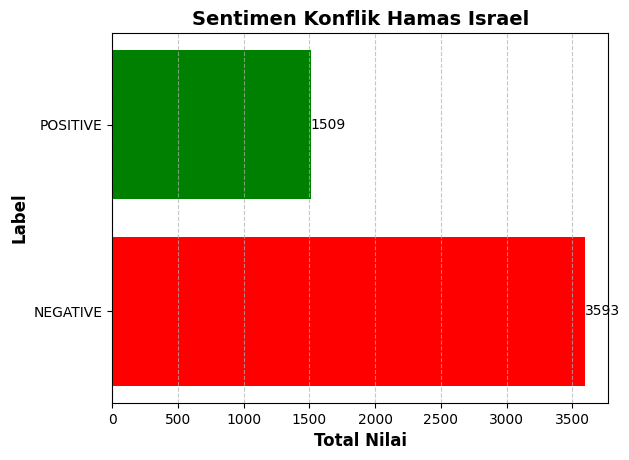

In [ ]:
# Menghitung jumlah nilai untuk setiap kategori label
values = df['label'].value_counts()

# Mendapatkan label dan nilai dari hasil penghitungan
labels = values.index.tolist()
total_values = values.tolist()

# Plotting
bars = plt.barh(labels, total_values, color=['red', 'green'])  # Menggunakan barh() untuk membuat grafik batang horizontal, menambahkan warna untuk setiap batang

# Menambahkan keterangan pada setiap batang
for bar, value in zip(bars, total_values):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value}', ha='left', va='center', color='black', fontsize=10)  # Menambahkan teks dengan warna hitam dan ukuran font 10

# Memberi judul dan label sumbu
plt.title('Sentimen Konflik Hamas Israel', fontsize=14, fontweight='bold')
plt.xlabel('Total Nilai', fontsize=12, fontweight='bold')
plt.ylabel('Label', fontsize=12, fontweight='bold')

# Menampilkan grid
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Menampilkan grid hanya pada sumbu x dengan garis putus-putus dan transparansi 0.7

# Menampilkan grafik
plt.show()


In [ ]:
pip install pandas wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

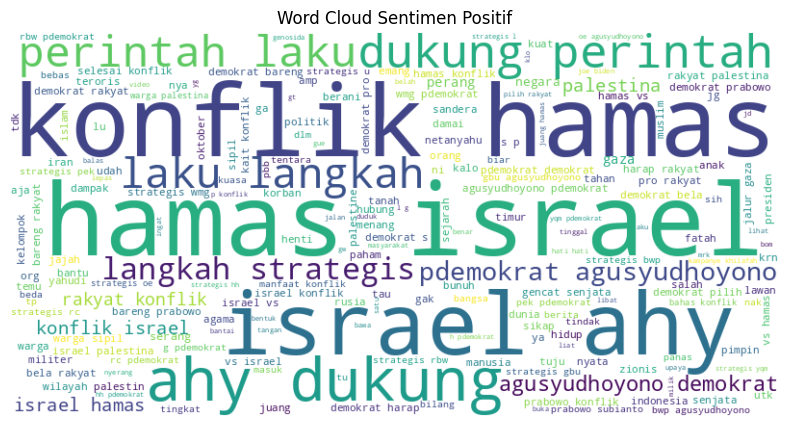

In [ ]:
# Memfilter kalimat dengan label POSITIVE
positive_sentences = df[df['label'] == 'POSITIVE']['kalimat'].str.cat(sep=' ')

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_sentences)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

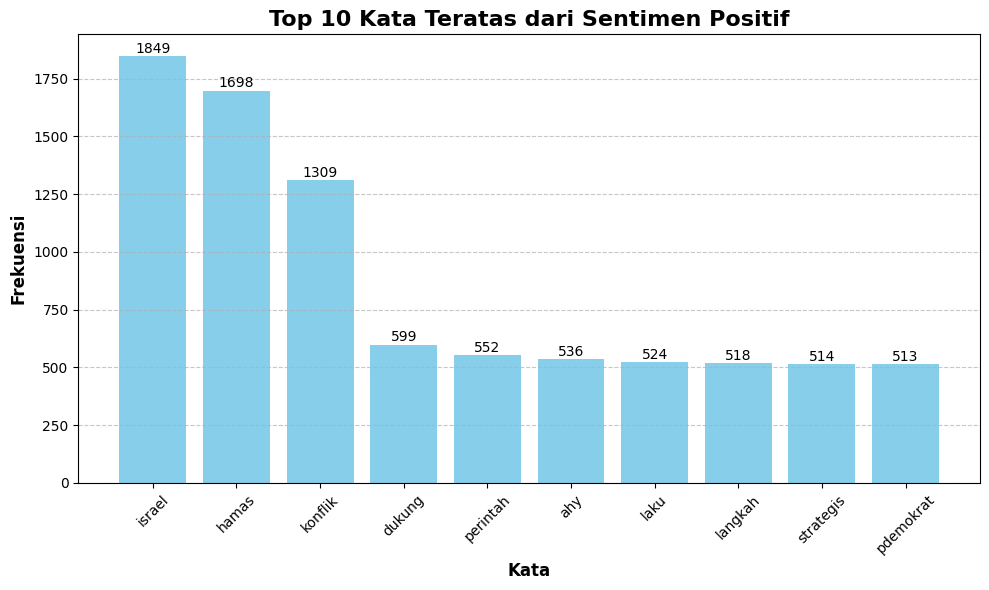

In [ ]:
# Memfilter kalimat dengan label 'POSITIVE'
positive_sentences = df[df['label'] == 'POSITIVE']['kalimat'].str.cat(sep=' ')

# Tokenisasi kata-kata dari setiap kalimat
positive_tokens = word_tokenize(positive_sentences)

# Menghitung frekuensi kemunculan kata-kata
fdist_positive = FreqDist(positive_tokens)

# Mengambil 10 kata teratas untuk sentimen positif
top_10_positive = fdist_positive.most_common(10)

# Membuat list kata dan frekuensi untuk plotting
words, frequencies = zip(*top_10_positive)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='skyblue')

# Menambahkan keterangan pada setiap batang
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, freq,
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Kata Teratas dari Sentimen Positif', fontsize=16, fontweight='bold')
plt.xlabel('Kata', fontsize=12, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

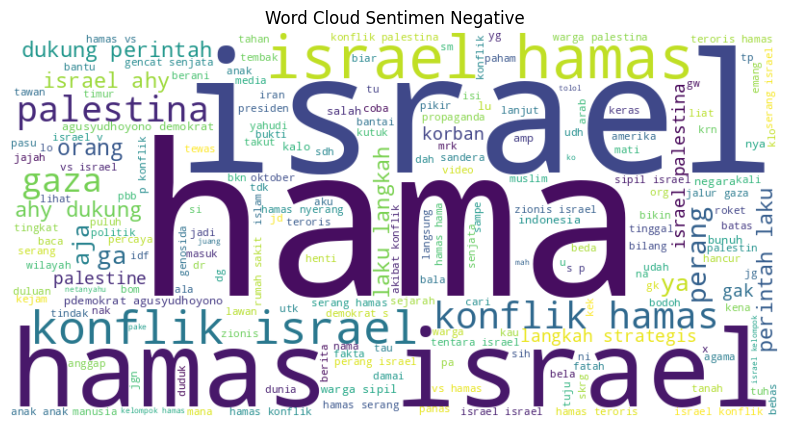

In [ ]:
# Memfilter kalimat dengan label NEGATIVE
negative_sentences = df[df['label'] == 'NEGATIVE']['kalimat'].str.cat(sep=' ')

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_sentences)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negative')
plt.show()

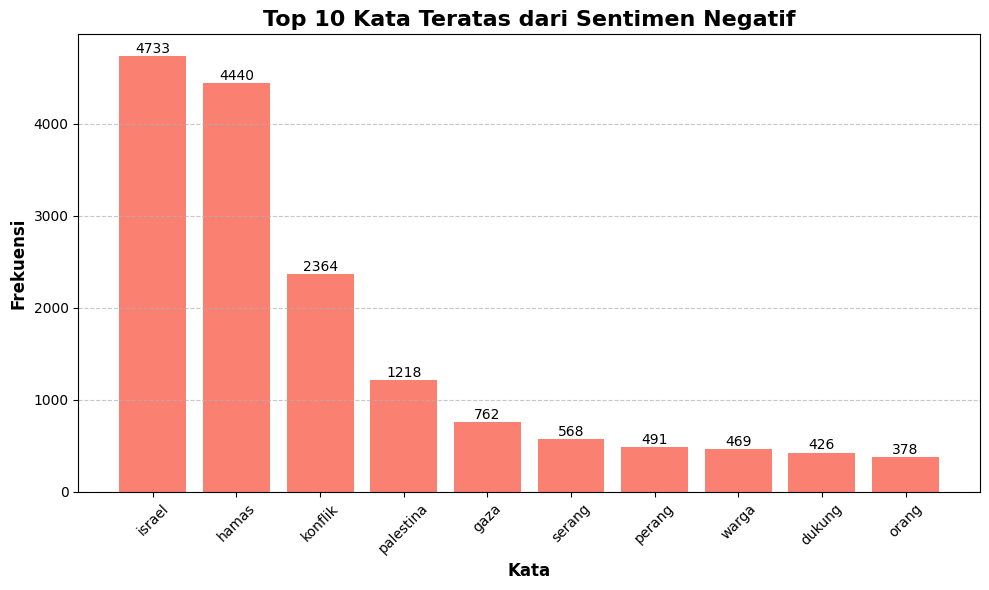

In [ ]:
# Memfilter kalimat dengan label 'NEGATIVE'
negative_sentences = df[df['label'] == 'NEGATIVE']['kalimat'].str.cat(sep=' ')

# Tokenisasi kata-kata dari setiap kalimat
negative_tokens = word_tokenize(negative_sentences)

# Menghitung frekuensi kemunculan kata-kata
fdist_negative = FreqDist(negative_tokens)

# Mengambil 10 kata teratas untuk sentimen negatif
top_10_negative = fdist_negative.most_common(10)

# Membuat list kata dan frekuensi untuk plotting
words, frequencies = zip(*top_10_negative)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='salmon')

# Menambahkan keterangan pada setiap batang
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, freq,
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Kata Teratas dari Sentimen Negatif', fontsize=16, fontweight='bold')
plt.xlabel('Kata', fontsize=12, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

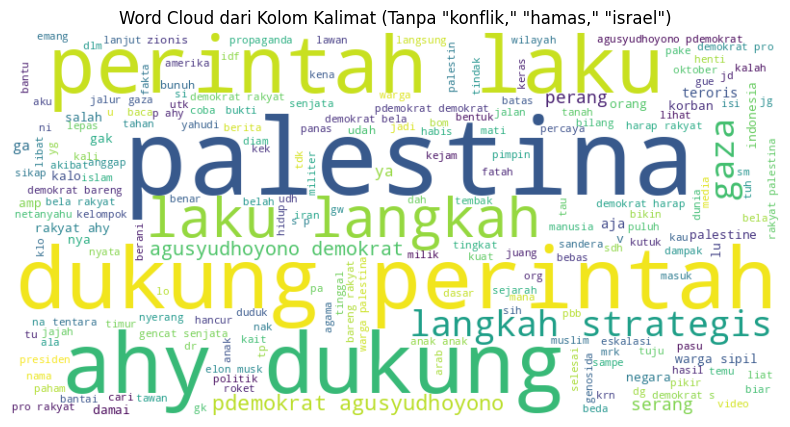

In [ ]:
# Menggabungkan semua kalimat menjadi satu teks
all_sentences = ' '.join(df['kalimat'])

# Menghapus kata-kata yang perlu di-exclude
exclude_words = ['konflik', 'hamas', 'israel']
for word in exclude_words:
    all_sentences = all_sentences.replace(word, '')

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kolom Kalimat (Tanpa "konflik," "hamas," "israel")')
plt.show()

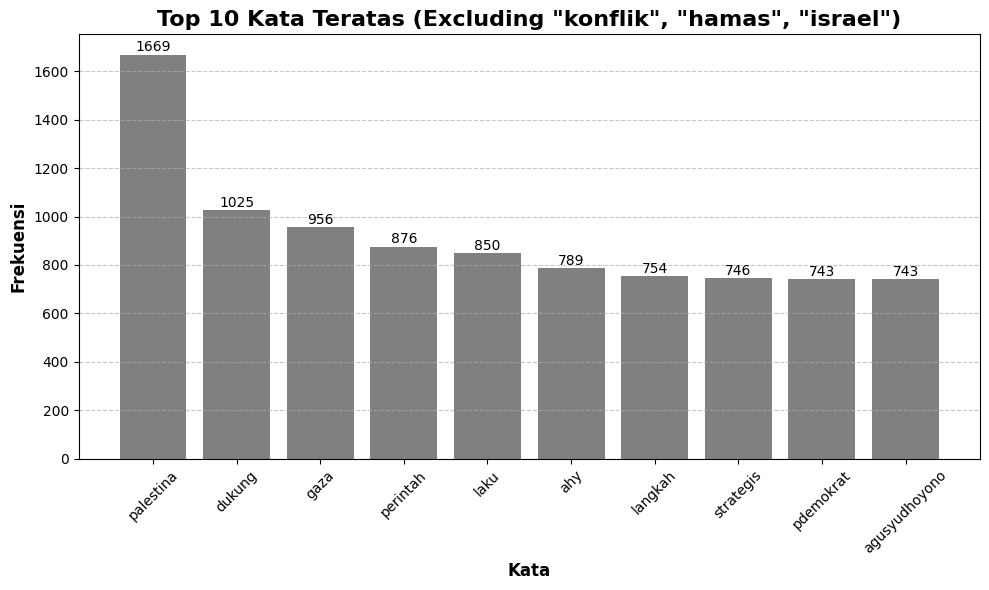

In [ ]:
# Menggabungkan semua kalimat menjadi satu teks
all_sentences = ' '.join(df['kalimat'])

# Tokenisasi kata-kata dari setiap kalimat
tokens = word_tokenize(all_sentences)

# Membuang kata-kata yang perlu di-exclude
exclude_words = ['konflik', 'hamas', 'israel']
filtered_tokens = [word for word in tokens if word.lower() not in exclude_words]

# Menghitung frekuensi kemunculan kata-kata
fdist = FreqDist(filtered_tokens)

# Mengambil 10 kata teratas
top_10_words = fdist.most_common(10)

# Membuat list kata dan frekuensi untuk plotting
words, frequencies = zip(*top_10_words)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(words, frequencies, color='gray')

# Menambahkan keterangan pada setiap batang
for bar, freq in zip(bars, frequencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, freq,
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top 10 Kata Teratas (Excluding "konflik", "hamas", "israel")', fontsize=16, fontweight='bold')
plt.xlabel('Kata', fontsize=12, fontweight='bold')
plt.ylabel('Frekuensi', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


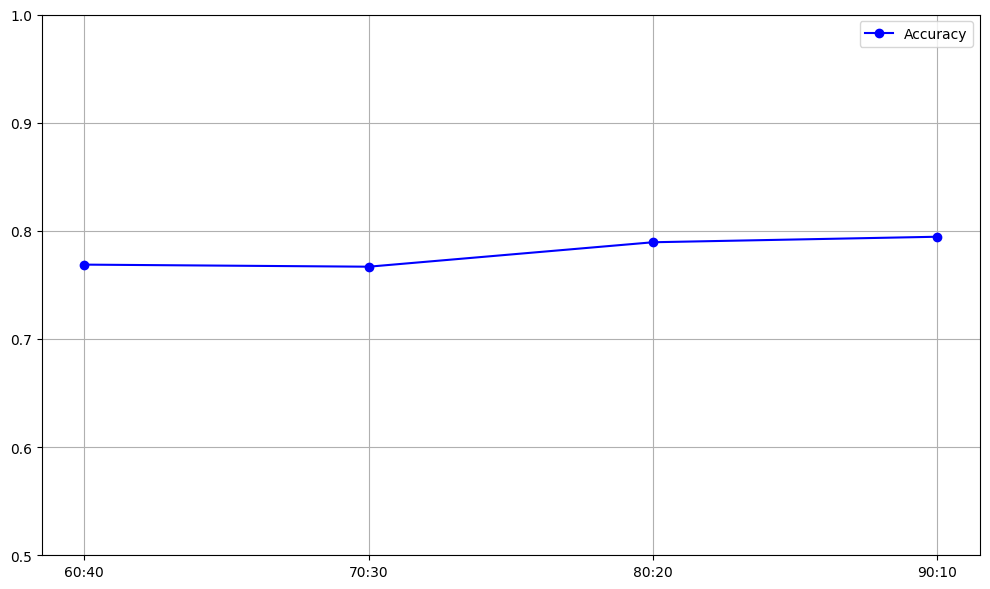

In [ ]:
# Data
ratios = ['60:40', '70:30', '80:20', '90:10']
accuracy = [0.7687408133268006, 0.766819072501633, 0.7894221351616063, 0.7945205479452054]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(ratios, accuracy, marker='o', label='Accuracy', color='blue')

plt.legend()
plt.grid(True)
plt.ylim(0.5, 1)  # Set the y-axis limit for better visualization of differences

plt.tight_layout()
plt.show()

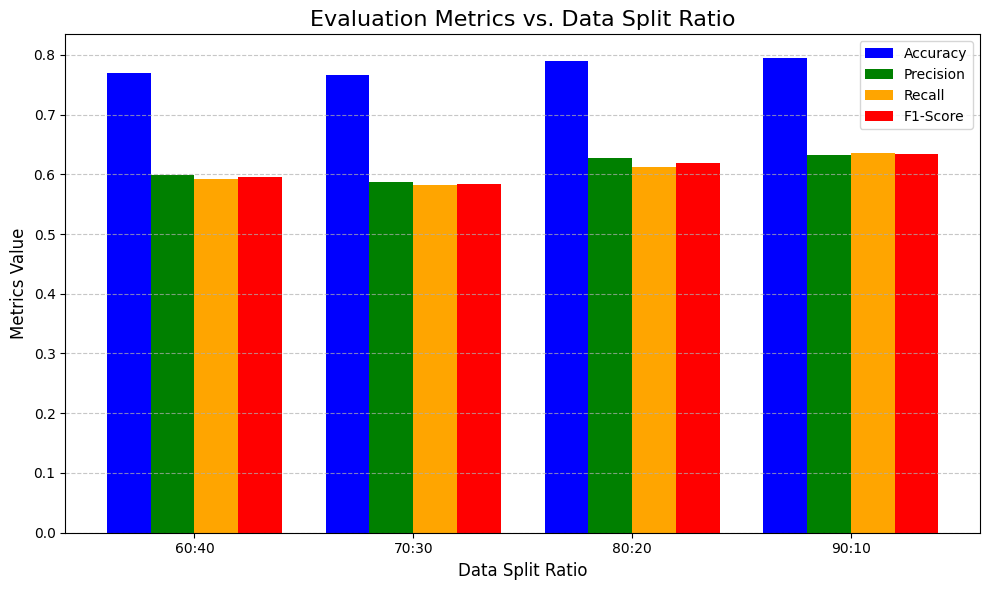

In [ ]:
# Data
ratios = ['60:40', '70:30', '80:20', '90:10']
accuracy = [0.7687408133268006, 0.766819072501633, 0.7894221351616063, 0.7945205479452054]
precision = [0.5989672977624785, 0.5864485981308412, 0.6272401433691757, 0.6319444444444444]
recall = [0.5928449744463373, 0.5823665893271461, 0.6118881118881119, 0.6363636363636364]
f1_score = [0.595890410958904, 0.5844004656577416, 0.6194690265486725, 0.6341463414634146]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(ratios))

plt.bar(index, accuracy, width=bar_width, label='Accuracy', color='blue')
plt.bar([i + bar_width for i in index], precision, width=bar_width, label='Precision', color='green')
plt.bar([i + bar_width*2 for i in index], recall, width=bar_width, label='Recall', color='orange')
plt.bar([i + bar_width*3 for i in index], f1_score, width=bar_width, label='F1-Score', color='red')

plt.title('Evaluation Metrics vs. Data Split Ratio', fontsize=16)
plt.xlabel('Data Split Ratio', fontsize=12)
plt.ylabel('Metrics Value', fontsize=12)
plt.xticks([i + 1.5*bar_width for i in index], ratios)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
